In [1]:
# https://medium.com/coffee-in-a-klein-bottle/deep-learning-with-julia-e7f15ad5080b

In [5]:
# import Pkg; Pkg.add("Flux")

In [3]:
using Plots
using Statistics#Auxiliary functions for generating our data
using Flux

In [4]:

function generate_real_data(n)
    x1 = rand(1,n) .- 0.5
    x2 = (x1 .* x1)*3 .+ randn(1,n)*0.1
    return vcat(x1,x2)
end

function generate_fake_data(n)
    θ  = 2*π*rand(1,n)
    r  = rand(1,n)/3
    x1 = @. r*cos(θ)
    x2 = @. r*sin(θ)+0.5
    return vcat(x1,x2)
end# Creating our data



generate_fake_data (generic function with 1 method)

In [6]:
train_size = 5000
real = generate_real_data(train_size)
fake = generate_fake_data(train_size)# Visualizing

2×5000 Matrix{Float64}:
 0.271972  0.00928761  0.0371361  0.184769  …  0.0503117  0.177146  0.297217
 0.459586  0.269005    0.501694   0.607347     0.499831   0.547583  0.519981

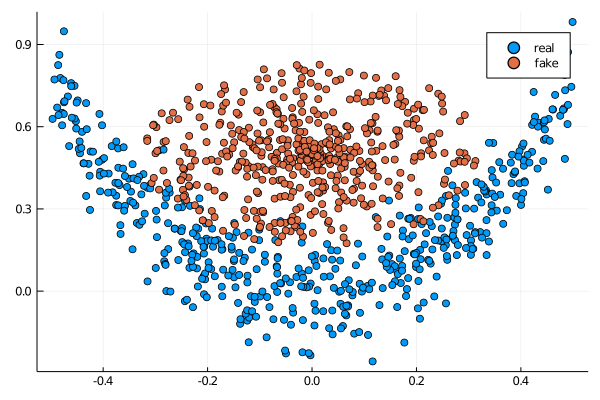

In [6]:

scatter(real[1,1:500],real[2,1:500], label = "real")
scatter!(fake[1,1:500],fake[2,1:500], label = "fake")

In [7]:
function NeuralNetwork()
    return Chain(
            Dense(2, 25,relu),
            Dense(25,1,x->σ.(x))
            )
end

NeuralNetwork (generic function with 1 method)

In [8]:
# Organizing the data in batches
X    = hcat(real,fake)
Y    = vcat(ones(train_size),zeros(train_size))
data = Flux.Data.DataLoader((X, Y'), batchsize=100,shuffle=true);# Defining our model, optimization algorithm and loss function
m    = NeuralNetwork()
opt = Descent(0.05)loss(x, y) = sum(Flux.Losses.binarycrossentropy(m(x), y))

UndefVarError: [91mUndefVarError: Flux not defined[39m